In [3]:
import gensim
import fasttext
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
#cbow
cbow = gensim.models.Word2Vec.load('models/cbow.model')

#skipgram
skipgram = gensim.models.Word2Vec.load('models/skipgram.model')

#fasttext
ft = fasttext.load_model('models/fasttext_model.bin')

In [13]:
print('CBOW vocabulary size:', len(cbow.wv))
print('Skipgram vocabulary size:',len(skipgram.wv))
print('Fasttext vocabulary size:', len(ft.words))

CBOW vocabulary size: 86922
Skipgram vocabulary size: 86922
Fasttext vocabulary size: 49568


In [21]:
df = pd.read_csv('data/preprocessed.csv')

text = ' '.join(df['preprocessed_text'])

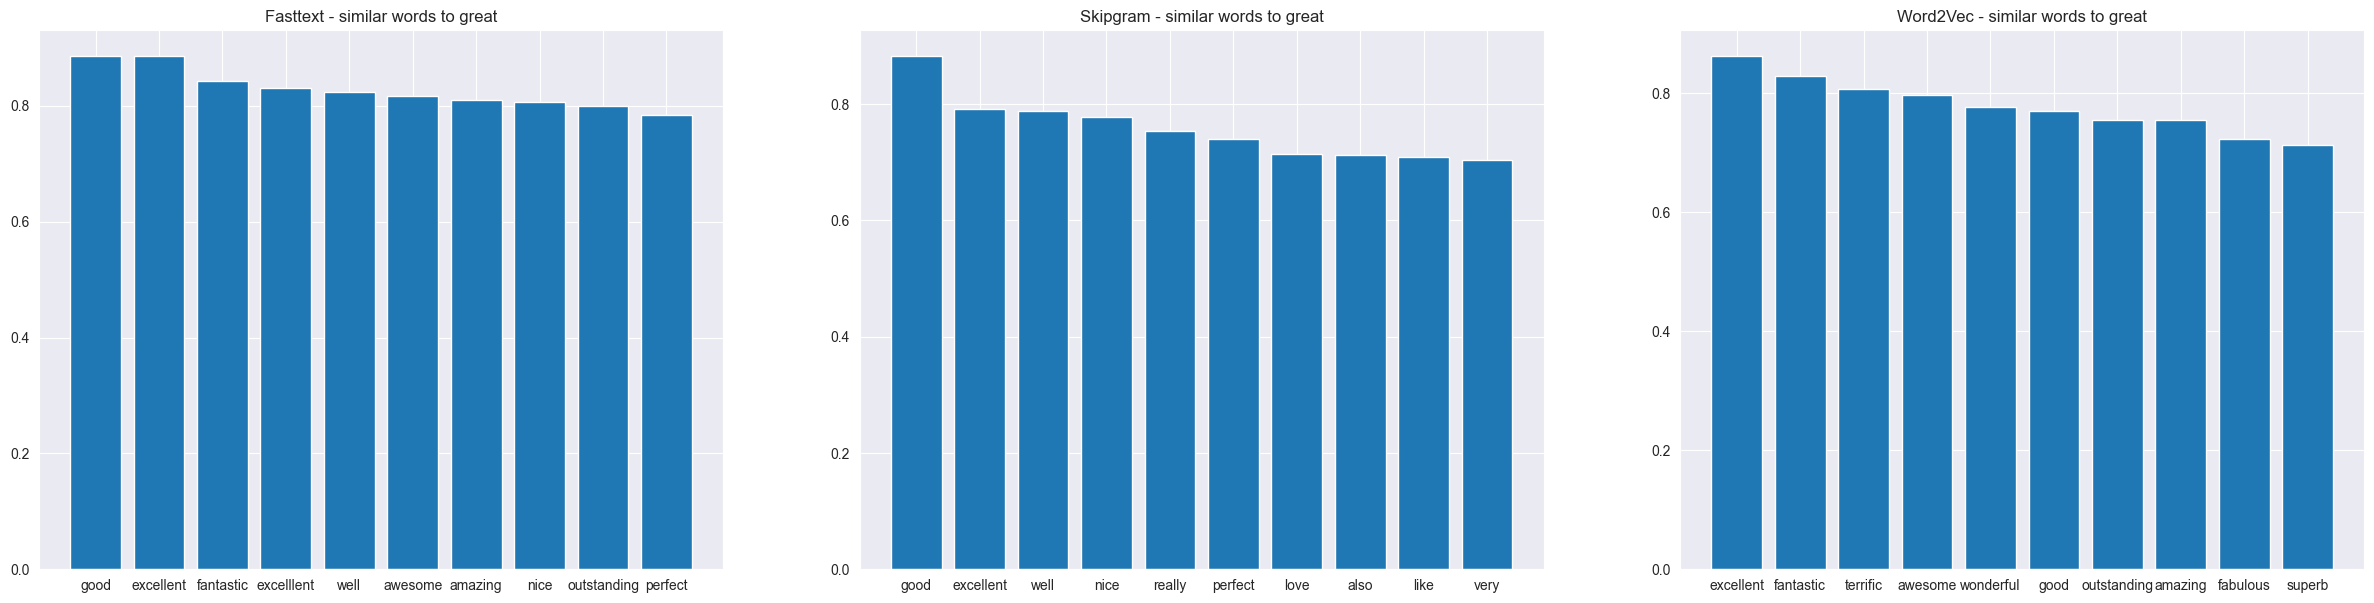

In [36]:
ft_great = []
for i in ft.get_nearest_neighbors('great', k = 50):
    if(i[1] in text):
        ft_great.append(i)
    if(len(ft_great) == 10):
        break

cbow_great = cbow.wv.most_similar('great')

sg_great = skipgram.wv.most_similar('great')

x = pd.DataFrame(data=ft_great, columns = ['similarity_to_great', 'word'])
y = pd.DataFrame(data=sg_great, columns = ['word','similarity_to_great'])
z = pd.DataFrame(data=cbow_great, columns = ['word','similarity_to_great'])

fig, ax = plt.subplots(1, 3)
fig.set_figheight(7)
fig.set_figwidth(30)
ax[0].bar(x['word'], x['similarity_to_great'])
ax[0].set_title('Fasttext - similar words to great')

ax[1].bar(y['word'], y['similarity_to_great'])
ax[1].set_title('Skipgram - similar words to great')

ax[2].bar(z['word'], z['similarity_to_great'])
ax[2].set_title('Word2Vec - similar words to great')

plt.show() 

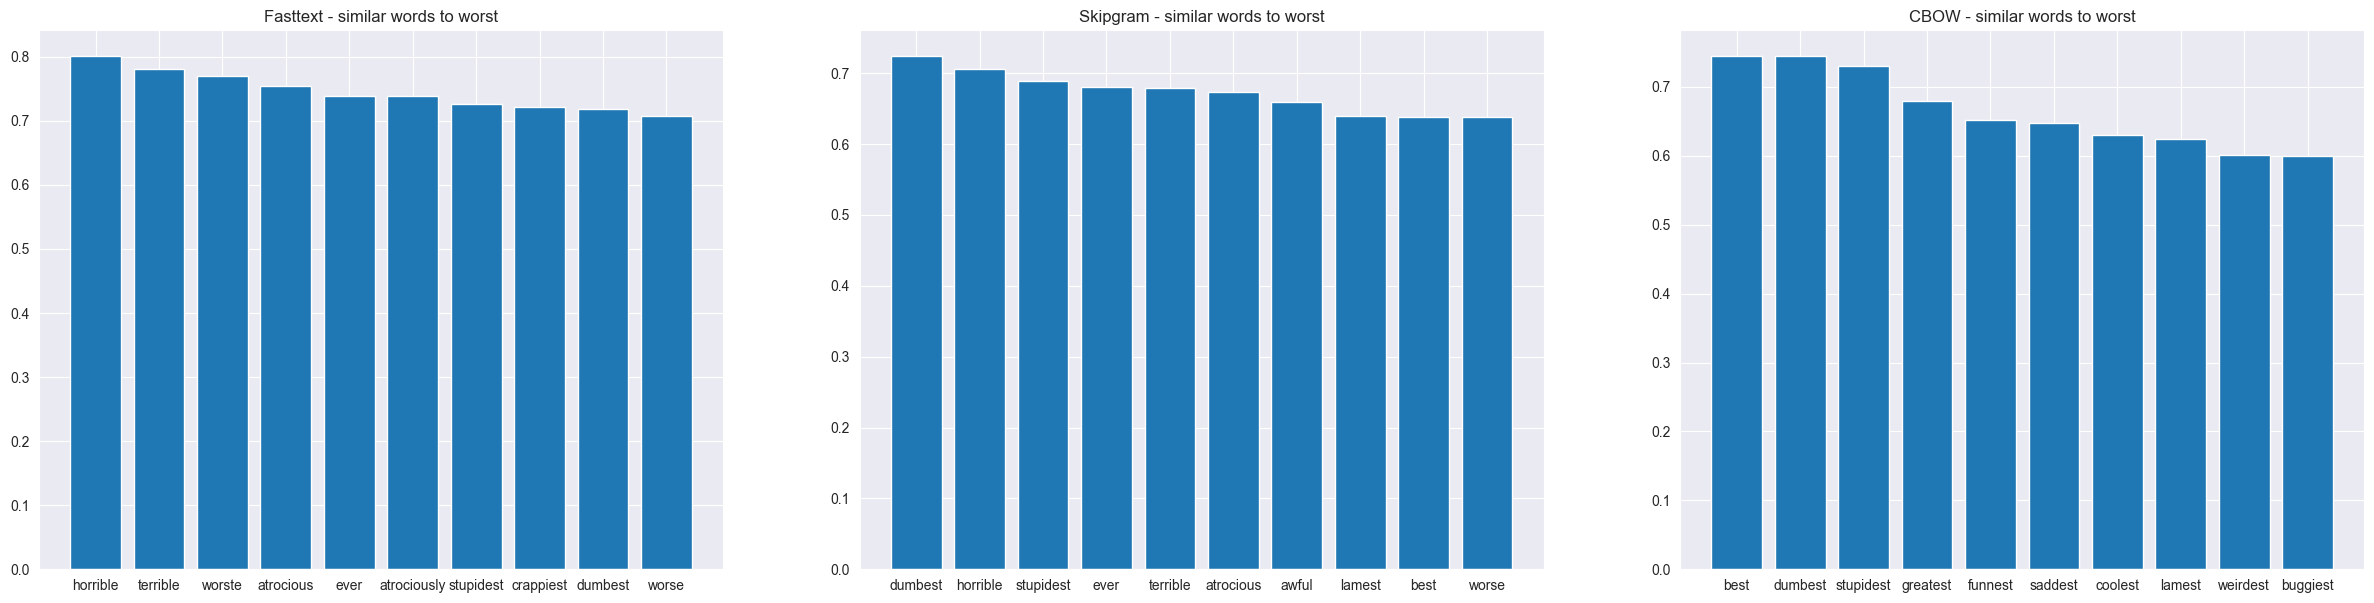

In [40]:
ft_worst = []
for i in ft.get_nearest_neighbors('worst', k = 50):
    if(i[1] in text):
        ft_worst.append(i)
    if(len(ft_worst) == 10):
        break

cbow_worst = cbow.wv.most_similar('worst')

sg_worst = skipgram.wv.most_similar('worst')

p = pd.DataFrame(data=ft_worst, columns = ['similarity_to_worst', 'word'])
q = pd.DataFrame(data=sg_worst, columns = ['word','similarity_to_worst'])
r = pd.DataFrame(data=cbow_worst, columns = ['word','similarity_to_worst'])

fig, ax = plt.subplots(1, 3)
fig.set_figheight(7)
fig.set_figwidth(30)
ax[0].bar(p['word'], p['similarity_to_worst'])
ax[0].set_title('Fasttext - similar words to worst')

ax[1].bar(q['word'], q['similarity_to_worst'])
ax[1].set_title('Skipgram - similar words to worst')

ax[2].bar(r['word'], r['similarity_to_worst'])
ax[2].set_title('CBOW - similar words to worst')

plt.show() 

In [106]:
import umap

def get_vector_wv(word, mod):
    return mod.wv.get_vector(word)

def get_vector(word, mod):
    return mod.get_word_vector(word)

def word_scatter_plot(a, b, model, vector_to_use, title, rs):
    eda = pd.DataFrame()
    
    a['category'] = 'great'
    b['category'] = 'worst'
    
    eda['word'] = pd.concat([a['word'], b['word']])
    eda['category'] = pd.concat([a['category'], b['category']])
    
    eda['vector'] = eda['word'].apply(lambda x: vector_to_use(x,model))
    
    cols = [f'e_{i}' for i in range(1, 100 + 1)]
    eda[cols] = pd.DataFrame(eda['vector'].tolist(), index= eda.index)
    

    
    red = umap.UMAP(n_components = 2, random_state = rs)
    red_X = pd.DataFrame(data = red.fit_transform(eda.drop(['word','vector', 'category'], axis = 1)), columns = ['umap1', 'umap2'])
    
    

    red_X['word'] = eda['word'].tolist()
    red_X['category'] = eda['category'].tolist()
    red_great = red_X[red_X['category'] == 'great']
    red_worst = red_X[red_X['category'] == 'worst']
    
    plt.scatter(red_great['umap1'], red_great['umap2'], c='g', marker='o', label = 'great')
    plt.scatter(red_worst['umap1'], red_worst['umap2'], c='r', marker='o', label = 'worst')
    
    for i, word in enumerate(red_X['word']):
        plt.annotate(word, (red_X['umap1'][i], red_X['umap2'][i]))
    plt.legend(loc = 'lower right')
    plt.title(title)
    plt.show()


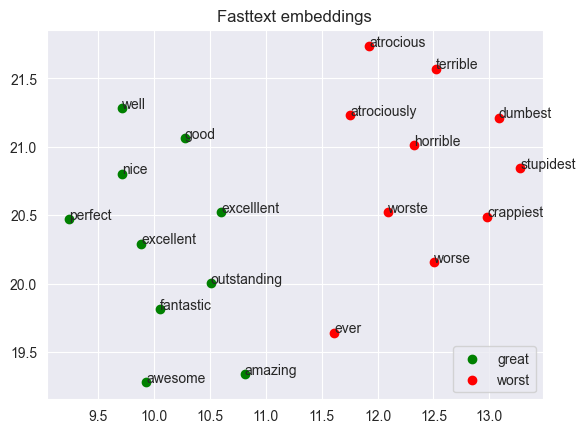

In [107]:
word_scatter_plot(x, p, ft, get_vector, 'Fasttext embeddings', 20)

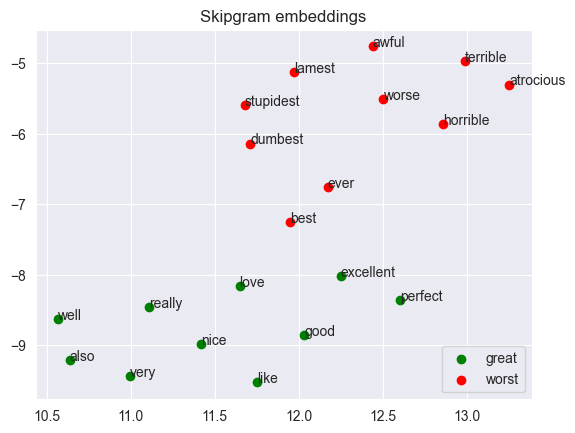

In [108]:

word_scatter_plot(y, q, skipgram, get_vector_wv, 'Skipgram embeddings', 40)

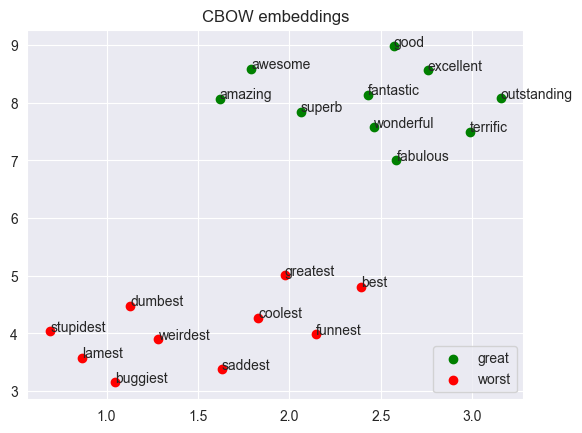

In [109]:

word_scatter_plot(z, r, cbow, get_vector_wv, 'CBOW embeddings', 40)